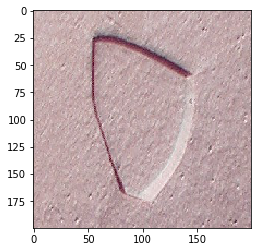

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
img = Image.open('CNNDATASET/1/1.jpg')
img_resize = img.resize((200,200))
plt.imshow(img_resize)

In [7]:
#一括で200×200で処理
import os
import glob
from PIL import Image

files = glob.glob('CNNDATASET/0/*.jpg')
for f in files:
    img = Image.open(f)
    img_resize = img.resize((200,200))
    ftitle, fext = os.path.splitext(f)
    img_resize.save(ftitle + '_200200' + fext)
    

In [8]:
#よし、やっとこれで本題へ
#8割を訓練用で、2割をテスト用データとする。
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import glob


Using TensorFlow backend.


In [28]:
import os
import glob
from PIL import Image

files = glob.glob('CNNDATASET/formed/*.jpg')
for f in files:
    img = Image.open(f)
    img_resize = img.resize((200,200))
    ftitle, fext = os.path.splitext(f)
    img_resize.save(ftitle + '_200200' + fext)

In [13]:
#xは画像データ、Yは正解ラベルのデータになる
#画像データを0〜1の範囲に変換。
X = X.astype('float32')
X = X / 255.0

In [14]:
#正解ラベルの形式を変換
Y = np_utils.to_categorical(Y,2)


In [15]:
#正解ラベルの形式を[1,0][0,1]にする
#学習用データとテストデータ
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
#CNNを構築
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])


In [17]:
history = model.fit(X_train, Y_train, epochs=10)

ValueError: Error when checking target: expected activation_6 to have shape (4,) but got array with shape (2,)

In [25]:
#上が動かなったので、下でやってみる
import keras 
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [29]:
import os
import glob
from PIL import Image

files = glob.glob('CNNDATASET/unformed/*.jpg')
for f in files:
    img = Image.open(f)
    img_resize = img.resize((200,200))
    ftitle, fext = os.path.splitext(f)
    img_resize.save(ftitle + '_200200' + fext)

In [30]:
files = glob.glob('CNNDATASET/unformed/*.jpg')

X = []
Y = []

for f in files:
    img = Image.open(f)
    data = np.asarray(img)
    X.append(data)
    Y.append(0)
X = np.array(X)
Y = np.array(Y)

In [32]:
print(X.shape)

(10, 200, 200, 3)


In [33]:
print(Y.shape)

(10,)


In [34]:
print(X.size)

1200000


In [35]:
#画像データを0から1の間に変換
X = X.astype('float32')
X = X / 255.0

In [36]:
#正解ラベルの形式を変換
Y = np_utils.to_categorical(Y,2)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)


In [40]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])


In [1]:
history = model.fit(X_train, y_train, epochs=1)

NameError: name 'model' is not defined